In [108]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

In [109]:
 # Beer API Key
api_key = api_keys.api_key

# Starting URL for Beer Map API Call
url = "http://api.brewerydb.com/v2/breweries/?key=d9e3c76540e2267dd4f9e09ede879957" #+ api_key 

In [110]:
api_key

'd9e3c76540e2267dd4f9e09ede879957'

In [111]:
years = [2013, 2014, 2015, 2016, 2017]
year = []
established = []
data_dict = dict()



record = 0

In [112]:
for year in years:
    try:
        response = requests.get((f"{url}&established={year}")).json()
       
        response.update(data_dict)
        
        year_est = "response"
        #print(response)

        #established.append(response['data'][record]["established"])
        established.append(response["totalResults"])
        
         # Increase counter by one 
        record = record + 1
        
    # If no record found "skip" to next call
    except:
        print("Beer not found.")
    continue
    
response
#print(len(established))


{'currentPage': 1,
 'numberOfPages': 7,
 'totalResults': 312,
 'data': [{'id': 'xQ9h2k',
   'name': '13 Below Brewery',
   'nameShortDisplay': '13 Below',
   'description': 'We are a craft brewery in Sayler Park along the Ohio River, west of downtown Cincinnati.',
   'website': 'http://www.13belowbrewery.com',
   'established': '2017',
   'isOrganic': 'N',
   'images': {'icon': 'https://s3.amazonaws.com/brewerydbapi/brewery/xQ9h2k/upload_cUJv8t-icon.png',
    'medium': 'https://s3.amazonaws.com/brewerydbapi/brewery/xQ9h2k/upload_cUJv8t-medium.png',
    'large': 'https://s3.amazonaws.com/brewerydbapi/brewery/xQ9h2k/upload_cUJv8t-large.png',
    'squareMedium': 'https://s3.amazonaws.com/brewerydbapi/brewery/xQ9h2k/upload_cUJv8t-squareMedium.png',
    'squareLarge': 'https://s3.amazonaws.com/brewerydbapi/brewery/xQ9h2k/upload_cUJv8t-squareLarge.png'},
   'status': 'verified',
   'statusDisplay': 'Verified',
   'createDate': '2017-10-07 15:47:12',
   'updateDate': '2017-10-10 14:48:55',
  

In [113]:
#response

In [168]:
# Create a dictonary of lists
#beer_dict = {"Established": years}

# Create a data frame from dictionary
#response.DataFrame(beer_dict)
# Display count of weather values 
#established.count()
# Display data frame head 
#established.head()

In [211]:
print(established)

[510, 510, 465, 403, 312]


In [171]:
beer_dict = {
    "Year": years,
    "Established": established,   
}

year_data = pd.DataFrame(beer_dict)
year_data.head()

,Year,Established
0,2013,510
1,2014,510
2,2015,465
3,2016,403
4,2017,312


In [172]:
beer_dict

{'Year': [2013, 2014, 2015, 2016, 2017],
 'Established': [510, 510, 465, 403, 312]}

In [173]:
year_data_index = year_data.set_index("Year")
year_data_index

,Established
Year,
2013,510
2014,510
2015,465
2016,403
2017,312


In [142]:
# Calculate Types and Totals

brewery_years = year_data_index.groupby("Year")
brewery_years.head()



,Established
Year,
2013,510
2014,510
2015,465
2016,403
2017,312


In [143]:
years_count = brewery_years.count()


sum_years= years_count.sum()
sum_years

Established    5
dtype: int64

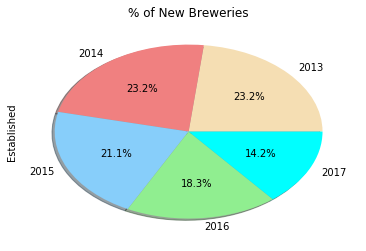

In [212]:
colors = ["wheat", "lightcoral", "lightskyblue", "lightgreen", "aqua"]
brewery_year = year_data_index.groupby("Year").sum()
brewery_year = brewery_year['Established']
x_axis = np.arange(len(brewery_year))
brewery_year.plot(kind = "pie", shadow=True, autopct = "%1.1f%%", colors=colors, title=("% of New Breweries"))

In [210]:
plt.savefig("Output/PercentBreweries.png")

<Figure size 432x288 with 0 Axes>